Social network analysis project: Political blogs network
Group members: Carucci Matteo, Agudio Tommaso, Natoli Alessandro, Formiconi Giulia.

In the code below, we prepare our dataset by extracting relevant information from the csv file containing all pair of nodes.
It is easy to see how networkx buikt-in function works. The dataset is read and a list is made: every element i is a tuple.

In [1]:
import csv
import networkx as nx
import random 
import matplotlib.pyplot as plt
import os
import numpy as np
lst = []

with open('Politicalnetwork.csv', newline='') as pol_net:
    reader = csv.reader(pol_net)
    for row in reader:
        for x in row:
            x = x.split(' ')
            if 'ï»¿' in x[0]:
                tr = x[0]
                tr = tr[3:]
                lst.append((int(tr), int(x[1])))
                
            else:
                x[0], x[1] = int(x[0]), int(x[1])
                lst.append((x[0],x[1]))
    
    G = nx.DiGraph()             #creating a directed empty graph
    G.add_edges_from(lst)        #populating the graph
    G.add_nodes_from(lst)  
    

We now try to draw the huge graph we have, there are over 10000 nodes in it!

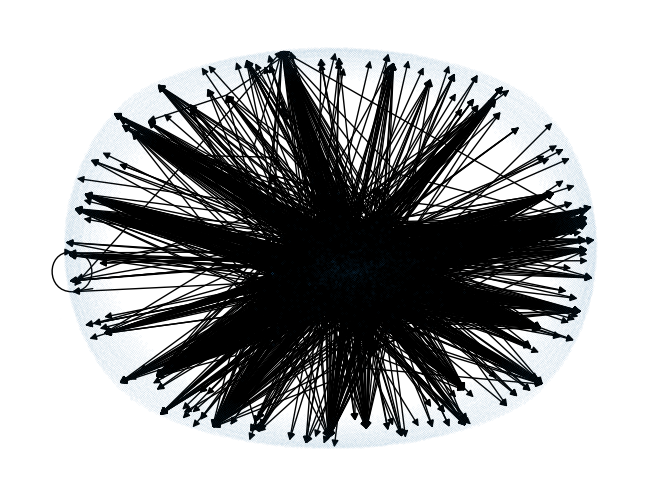

In [10]:
nx.draw(G, node_size = 0.001)

The whole graph looks quite dense in the middle. By looking at it, we can notice that there's a significant number of nodes which point nowhere and hence what we are going to focus on, is essentially the core part.

As requested, we find some important metrics which will tell us a little more about the graph structure. First off, we find out that some metrics cannot be assessed(graph not connected).
The easiest thing to do is to create functions that can be always used!

In [6]:
#computing density and other metrics
    
def density(G):
    #mtx = nx.adjacency_matrix(G)
    #n = G.number_of_nodes()
    #m = mtx.sum()     #sum of all degrees(and hence connections as the graph is not weighted)        
    
    #d = m//(n*(n-1))             #since it is directed graph, I don't have to divide by 2
        
    
    #in my network, the density can be easily obtained with:
    den = nx.density(G)
    print(den)
    return den
    
 
        
    #average degree = sum of all adjacency matrix numbers/ number of nodes

def av_degree(G):
    s = 0
    n = G.number_of_nodes()
    for x in G.nodes():
        s += G.degree(x)
        
    av_d = s/n
    print(av_d)
    return av_d

    
def diameter(G):
    diam = nx.diameter(G)
    print(diam)
    return diam      #infinite since the graph is disconnected and not weakly connected! Political blogs are not related rather they are clustered!

# x = diameter(G)
    
def av_distance(G):   #aka Average path length
    avs = nx.average_shortest_path_length(G)
    print(avs)
    return avs   #does not return it, since the graph as we said is not weakly connected! We need to find its components 

#av_distance(G)
    

We found out that some metrics cannot be computed since both our graph and some randomly generated subgraphs are not either weakly connected(Majority of cases). What we can do instead, is find the largest components in the network so that we can study them carefully.
We will use some networkx functions to do so; essentially nx.strongly_connected components returns all the strongly connected components of our network but we're only interested in the largest one which can be found, after sorting the generator, by selecting the max of all! What we notice is that there's only one important component in the network, whilst the others are just singletons or irrelevant ones.

In [2]:

#print(sum(nx.connected_components(G)))    
#G_maincom = G.subgraph(largest_c)    #takes a subgraph of the largest connected component
G_weakcom = G.subgraph(max(nx.weakly_connected_components(G), key=len))
print('number of nodes in the largest weakly connected graph is:', len(max(nx.weakly_connected_components(G), key=len)))    #(made of 1222 nodes) this simply shows the largest strongly component as well as the weakly component
print('number of nodes in the largest strongly component graph is:', len(max(nx.strongly_connected_components(G),key=len)))         #this is made up of 793 elements!!!
G_strcom = G.subgraph(max(nx.strongly_connected_components(G), key=len)) 
    #ans = nx.is_connected(G_maincom)    #is it connected?
    #print(ans)

#nx.draw_circular(G_weakcom, with_labels=True, node_size= 0.001)
#nx.draw_circular(G_strcom , with_labels=False, node_size= 0.00001)
#nx.draw(G_strcom, node_size =0.0001)


#plt.show(G_weakcom)             #plotting weakcom and strcom
#plt.show(G_strcom)

for i in range(11):
    c = 0
    str_sort = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    print('Elements in the', str(i)+'th','component is', len(str_sort[i]))          #we see that there is only 1 big weakly connected component(1222 elements), and one made of 2 elements
                                                                                    # regarding the strongly connected components, there is a big one(793 nodes), and 9 which only have 2 nodes.
largest_network = str_sort[0]          #this is the largest component in or network.   
    
    

number of nodes in the largest weakly connected graph is: 1222
number of nodes in the largest strongly component graph is: 793
Elements in the 0th component is 793
Elements in the 1th component is 3
Elements in the 2th component is 2
Elements in the 3th component is 2
Elements in the 4th component is 2
Elements in the 5th component is 2
Elements in the 6th component is 2
Elements in the 7th component is 2
Elements in the 8th component is 2
Elements in the 9th component is 2
Elements in the 10th component is 1


Now what we want to do is studying the largest subnetworks of our political blogs network. We'll be evaluating some local and global parameters as we have tried to do before with the whole graph G. The relative small diameter and the large average degree show again how compact and interconnected the component is.

In [7]:
print(f"density of the strongly connected component is {density(G_strcom)}")
print(f"density of the weakly connected component is {density(G_weakcom)}")
print(f"Average degree of strongly is {av_degree(G_strcom)}")
print(f"Average degree of weakly is {av_degree(G_weakcom)}")
print(f"diamater of strongly is {diameter(G_strcom)}")
#print(f"diamater of weakly is {diameter(G_weakcom)}")
print(f"Average path length of strongly is {av_distance(G_strcom)}")
print(f"Average path length of weakly is {av_distance(G_weakcom)}")



0.025129924720088653
density of the strongly connected component is 0.025129924720088653
0.012750140409714878
density of the weakly connected component is 0.012750140409714878
39.80580075662043
Average degree of strongly is 39.80580075662043
31.135842880523732
Average degree of weakly is 31.135842880523732
8
diamater of strongly is 8
3.1887283936464264
Average path length of strongly is 3.1887283936464264
2.229538718900421
Average path length of weakly is 2.229538718900421


Let us now try to visualize both the strongly connected component. As we suspected, it is easy to see that there is a huge community in the middle which is very dense and outside nodes are quite sparse.

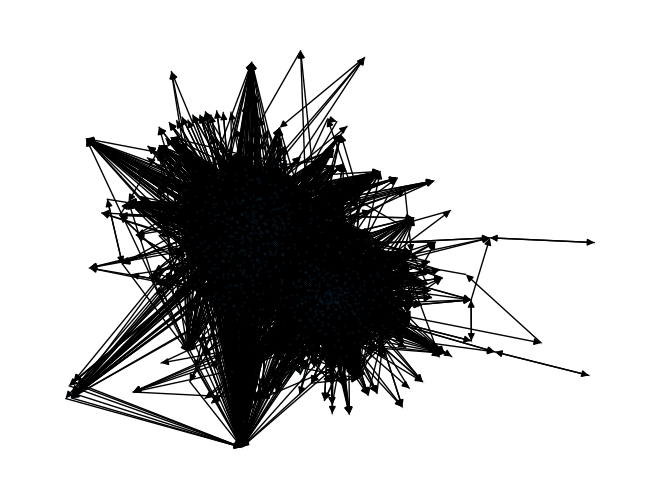

In [8]:
nx.draw(G_strcom, node_size= 0.01)
#nx.draw(G_weakcom, node_size = 0.001)

What we want to do now is to measure the degrees of nodes without using networkx.
Hence we will simply measure in and out degree of each node by summing entries in its row(out degree) and entries in its column(in degree)

In [ ]:
names = G_strcom.nodes()
def Indegree(G,j):
    sum = 0
    A = nx.adjacency_matrix(G_strcom)
    #B = nx.to_numpy_matrix(A)
    N = G_strcom.number_of_nodes()

    for i in range(N):
        sum += A[i,j]
    
    return sum

def Outdegree(G,i):
    sum = 0
    A = nx.adjacency_matrix(G_strcom)
    N = G_strcom.number_of_nodes()

    for j in range(N):
        sum += A[i,j]
    
    return sum 
   


indegrees = []
outdegrees = []
for f in range(G_strcom.number_of_nodes()):
    indegrees.append(Indegree(G_strcom, f))
    outdegrees.append(Outdegree(G_strcom,f))



    


Below, the plot showing the in degrees.

Text(0, 0.5, 'indegree')

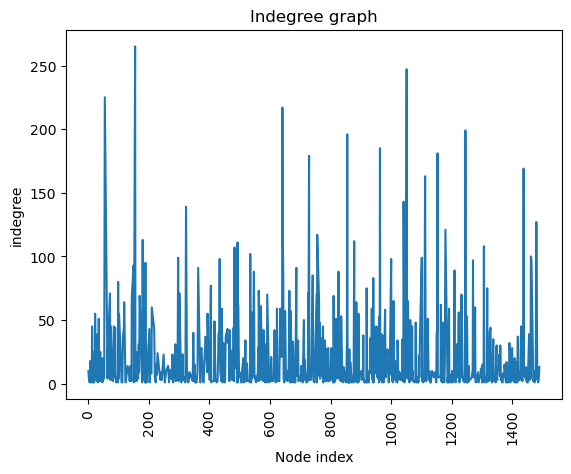

In [64]:

plt.title('Indegree graph')
plt.xticks(rotation = 90)
plt.plot(names,indegrees)
plt.xlabel('Node index')
plt.ylabel('indegree')

Below, a plot of the outdegree for each node.

Text(0, 0.5, 'outdegree')

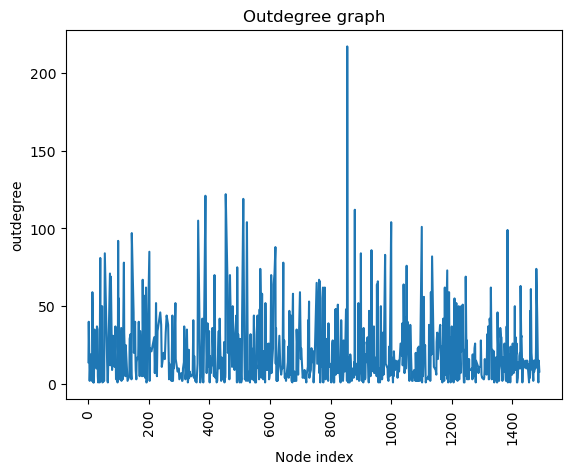

In [65]:

plt.title('Outdegree graph')
plt.xticks(rotation = 90)
plt.plot(names,outdegrees)
plt.xlabel('Node index')
plt.ylabel('outdegree')

What we can do now, is to figure out nodes in G_strcom which have min/max indegree and outdegree!
We'll simply look at the index of them.

In [4]:
newnames = list(names)
maxout = max(outdegrees)
maxind = max(indegrees)
ind_max = indegrees.index(maxind)
out_max = outdegrees.index(maxout)
nodeind = newnames[ind_max]
nodeout = newnames[out_max]

print(f"node with max indegree is {nodeind} which has {maxind} indegree and {outdegrees[ind_max]} outdegree")
print(f"node with max outdegree is {nodeout} which has {maxout} and {indegrees[out_max]} indegree")

node with max indegree is 155 which has 265 indegree and 40 outdegree
node with max outdegree is 144 which has 97 and 68 indegree


What we can further do is to plot the distribution of both indegree and outdegree to understand whether nodes have very similar centrality or not.

Text(0, 0.5, 'frequency of indegree')

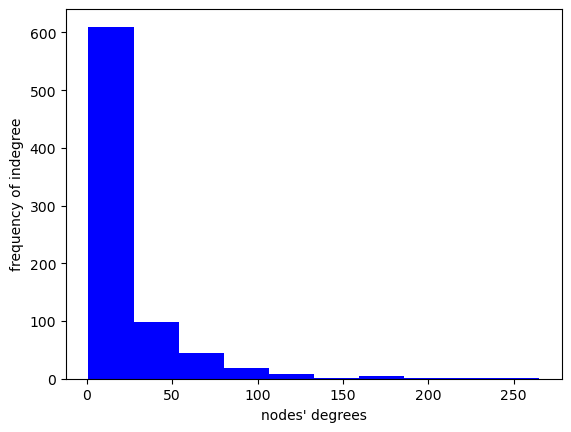

In [72]:

'''l = indegrees
l = np.array(l)
values, counts = np.unique(l, return_counts=True)

plt.plot(values, counts) 
plt.xlabel('degrees')
plt.ylabel('occurrences') '''

plt.hist(indegrees, facecolor = 'blue')
plt.xlabel("nodes' degrees")
plt.ylabel('frequency of indegree')


As we can see many nodes have very similar indegree. There are a few (maybe one) that have a huge indegree. Before studying the node, let us look at the outdegree distribution!

Text(0, 0.5, 'frequency of outdegree')

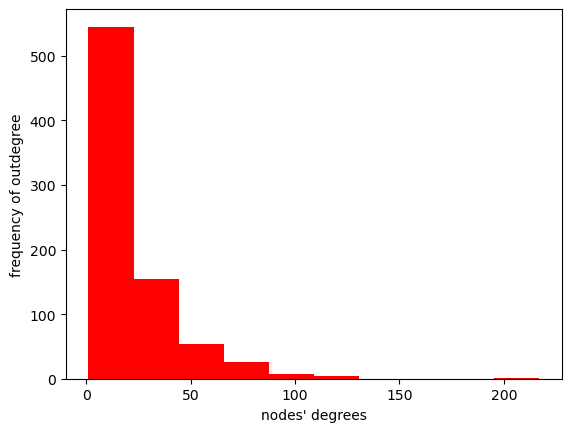

In [73]:
plt.hist(outdegrees, facecolor = 'red')
plt.xlabel("nodes' degrees")
plt.ylabel('frequency of outdegree')


Again the same happens. Many nodes have same outdegrees and few seem to be really central as they may play a crucial role in the network.
What we can further do, is to better represent the graph using node sizes proportional to the degree distribution (say for indegree distribution).

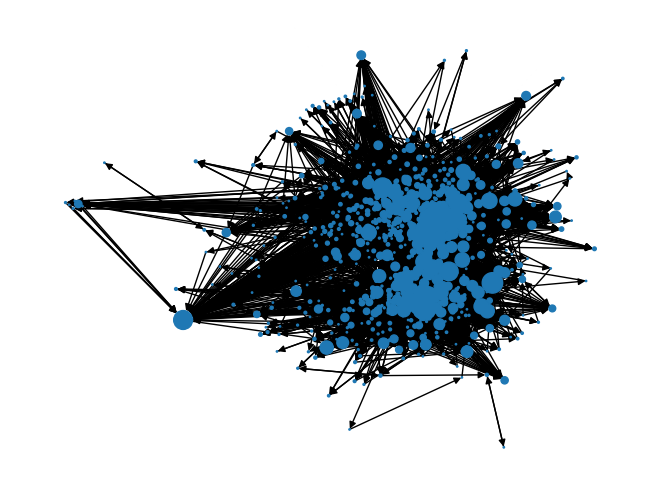

In [81]:
nx.draw(G_strcom, node_size = indegrees, with_labels= False)

Looking at the graph we might say: "wow that's pretty dense one and some key nodes are really close to each other!". Hence, an idea can be to easily compute the clustering coefficient which will tell us to what extent nodes tend to cluster together.
At the same time though, we see some nodes(with particular regard to the bottom-left one) which are not in the "centre of the graph"; another measure that we can take into account then might be of course the closeness centrality!
We want to compute the normalized one but before we need to retrieve the shortest paths between all pairs and get the sum: the built in function all_pairs_shortest_path_length does the job! 
Since it is a generator, it is turned into a dictionary and then a new dictionary called 'distances', will contain the sum of all shortest paths for each node.

In [ ]:
print(dict(nx.all_pairs_shortest_path_length(G_strcom)))
A = dict(nx.all_pairs_shortest_path_length(G_strcom))
distances = {}
for k,v in A.items():
    distances[k] = sum(v.values())
#print(distances)


Just a check to see if everything works fine!

In [ ]:

print(distances)

Finally we can compute the closeness centrality as we have all ingredients: a simple loop will get the job done.

In [ ]:
distlist = list(distances.values())    #list containing the sum of shortest paths for each node
def closenesscentrality(G,distlist):
    closeness = {}
    listofnames = list(names)
    N = G_strcom.number_of_nodes()
                                                               
    for i in range(N):
        closeness[listofnames[i]] = (N-1)/(distlist[i]) 
    
    print(closeness)
   
    return closeness  

closeness = closenesscentrality(G_strcom, distlist) 
    

The histogram below will show how similar the closeness centralities are among nodes(first 300 with largest closeness centrality are considered)

(array([77., 61., 65., 34., 32., 14.,  4.,  6.,  4.,  3.]),
 array([0.33361415, 0.34362623, 0.35363831, 0.36365039, 0.37366247,
        0.38367455, 0.39368663, 0.4036987 , 0.41371078, 0.42372286,
        0.43373494]),
 <BarContainer object of 10 artists>)

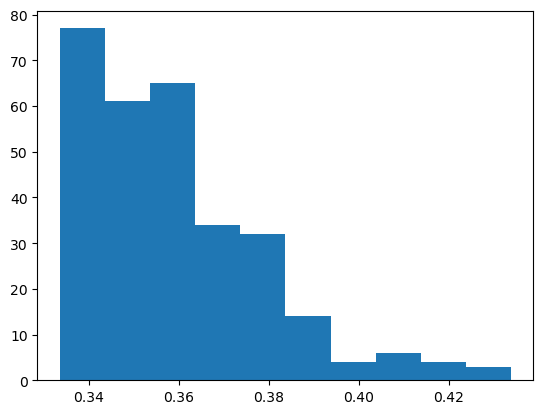

In [52]:
lstcentral = []
copyclose = closeness
copyclose = list(copyclose.values())
for i in range(300):
    lstcentral.append(max(copyclose))
    copyclose.remove(max(copyclose))

plt.hist(lstcentral)



Now that we have found the closeness centrality, we can see that many nodes have similar normalized centralities(as also shown in the degree distribution). Now that we know this measure we have a better understanding on the key nodes in the network. The next step is to use another measure to assess the nodes' importance that is the pagerank; It gives a measure on how "important" a node is in the network.

What we have done before was to create a list of the outdegrees of every node. We'll instead make a dictionary so that we can work better(especially for computing page rank, it will be really useful to have this data structure)

In [ ]:
dictoutd = {}
listofnames = list(G_strcom.nodes())
for i in range(len(outdegrees)):
    dictoutd[listofnames[i]] = outdegrees[i]

print(dictoutd)


The first thing to do is to create a dictionary containing the list of predecessors for each node. This can be easily done with the predecessors built in function, which returns a list of the node's predecessors.

In [ ]:

preddict = {}
initial = {}
for x in listofnames:
    preddict[x] = list(G_strcom.predecessors(x))
print(preddict)

#outdegrees dictionary




We want to compare our results to the actual ones made by the networkx function pagerank. This will tell us if our algorithm is making the right job or not.

In [ ]:
#true pagerank 
N = G_strcom.number_of_nodes()
print(nx.pagerank(G_strcom,alpha= 0.85, tol=1e-06))



Pagerank algorithm finally comes. We set the parameter alpha and 1-alpha to get everything started. To make sure that we can start, we initialize the initial iteration pagerank values to be equal to 1/N, as the defintion suggests; those are all stored in pagerank dictionary that is then copied into pagerank2. The algorithm that we implemented is an iterative one which we keep running until the ith-1 and ith pagerank values are equal(they converge), as seen in the line containing the if condition "if pagerank[y]!=pagerank2[y]", where pagerank2 is the current iteration and pagerank the i-th one. After explaining this concept, it is easy to see how the algorithm works; in the first for loop every single pagerank for any node is computed and placed into pagerank2. In the second for loop we perform the if condition that we previously mentioned.

In [ ]:
N = G_strcom.number_of_nodes()
alpha = 0.15/N 
R0 = 1/N  
scalpha = 0.85       #sum(R[i-1])


pagerank = {}
for i in listofnames:
    pagerank[i] = R0
pagerank2 = pagerank.copy()

while True:
    for y in preddict:
        v = preddict[y]
        summ = 0
        for i in v:
            summ = summ + (pagerank[i]/dictoutd[i])
        page = alpha + scalpha*(summ)
        
        pagerank2[y] = page
    c=0
    for y in pagerank:
        if pagerank[y]!=pagerank2[y]:
            #print(pagerank[y],pagerank2[y])
            continue
        else:
            c=c+1
    if c==len(pagerank):
        break
    else:
        pagerank=pagerank2.copy()
   
    
print(pagerank2) 



    


    
        


Let's see if pagerank centrality corresponds roughly to the closeness centrality we computed before!
As we can see the winner is node 155 which was the one with the highest indegree of the component.

In [20]:
maxpgrank = max(pagerank2.values())
ind = list(pagerank2.values()).index(maxpgrank)
print(f'The most central node according to pagerank is {listofnames[ind]}')

The most central node according to pagerank is 155


Let's plot our results in a plot, on the x axis the node number and o y their pagerank. The graph is very similar to the indegree distribution that we have already seen and the same nodes appear to be the most important ones in the network.

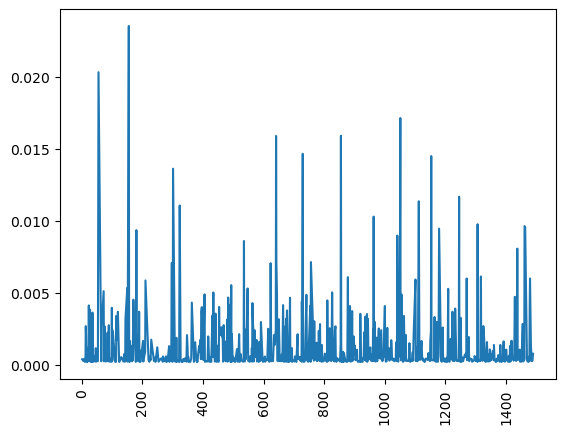

In [21]:
plt.xticks(rotation = 90)
plt.plot(listofnames, pagerank2.values())

Another thing that we can do is to plot the cumulative distribution of the pagerank centralities and compare it to the indegree centrality(we expect them to be quite similar).

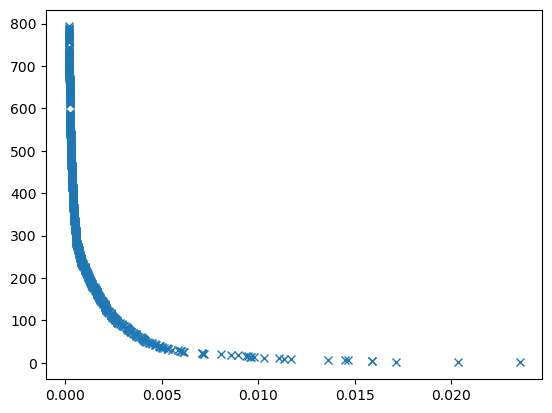

In [22]:
cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

pr_values_copy = list(pagerank2.values()).copy() 
N = len(pr_values_copy)
N_temp = N 

while pr_values_copy:
    current_min = min(pr_values_copy) 
    current_num = pr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        pr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

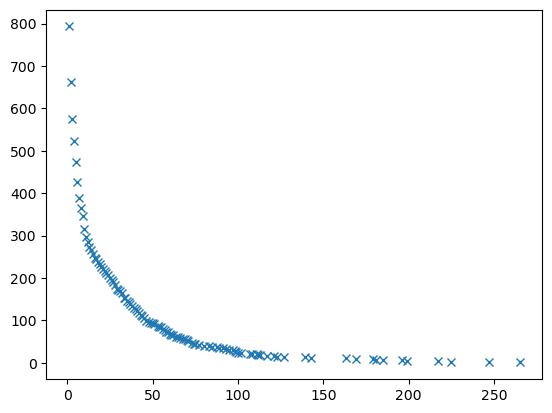

In [23]:
cdf_x = []  
cdf_y = []  

data_centralities_copy = indegrees.copy() 
N = len(data_centralities_copy)
N_temp = N 

while data_centralities_copy:
    current_min = min(data_centralities_copy) 
    current_num = data_centralities_copy.count(current_min) 
    cdf_x.append(current_min)
    cdf_y.append(N_temp) 
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        data_centralities_copy.remove(current_min) 
        
plt.plot(cdf_x, cdf_y, "x")

Indeed, the 2 distributions are extremely similar, showing that there are a few crucial nodes which seem to be the most important blogs in the network, they receive a lot of emails and send them too(the outdegree distribution is again very similar to the indegree one, the blogs which are central are also the most important).

Let's also have a look on the 300 nodes with the highest closeness centralities.

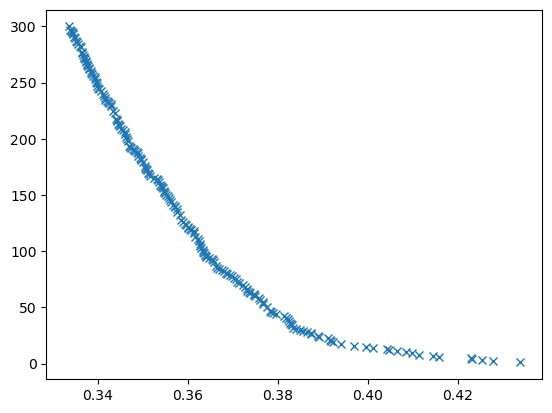

In [53]:
cdf_x = []  
cdf_y = []  

data_centralities_copy = lstcentral.copy() 
N = len(data_centralities_copy)
N_temp = N 

while data_centralities_copy:
    current_min = min(data_centralities_copy) 
    current_num = data_centralities_copy.count(current_min) 
    cdf_x.append(current_min)
    cdf_y.append(N_temp) 
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        data_centralities_copy.remove(current_min) 
        
plt.plot(cdf_x, cdf_y, "x")

What we can furtherly do now, is to show the k-core of the network. The k-core is an undirected subgraph in which each node has at least k-degree. To make the function work, we delete some cycles(probably they are wrong sent emails or internal communications)

In [24]:
newG = nx.DiGraph(G_strcom)
newG.remove_edges_from(nx.selfloop_edges(newG))
for i in range(1,30):
    print(f"for {i}th-core the number of nodes is: {len(nx.k_core(newG, k = i))}")


for 1th-core the number of nodes is: 793
for 2th-core the number of nodes is: 793
for 3th-core the number of nodes is: 763
for 4th-core the number of nodes is: 729
for 5th-core the number of nodes is: 704
for 6th-core the number of nodes is: 671
for 7th-core the number of nodes is: 649
for 8th-core the number of nodes is: 628
for 9th-core the number of nodes is: 610
for 10th-core the number of nodes is: 600
for 11th-core the number of nodes is: 586
for 12th-core the number of nodes is: 564
for 13th-core the number of nodes is: 543
for 14th-core the number of nodes is: 525
for 15th-core the number of nodes is: 501
for 16th-core the number of nodes is: 477
for 17th-core the number of nodes is: 464
for 18th-core the number of nodes is: 444
for 19th-core the number of nodes is: 411
for 20th-core the number of nodes is: 395
for 21th-core the number of nodes is: 391
for 22th-core the number of nodes is: 384
for 23th-core the number of nodes is: 367
for 24th-core the number of nodes is: 365
f

As we have seen during this loop, there are subgraphs which contain very connected graphs. Indeed we see that nodes having at least degrees = 20 are 400! which is half of the graph size. This can tell us that the graph is quite interconnected, in particular all nodes have at least degree>=2.

The next task we are going to do is community detection. Even though our component is itself a very dense and strong community we want to furtherly look for subcommunities in this network. It is important to make our component an undirected one; in this way we can implement all the techniques used in community detection.

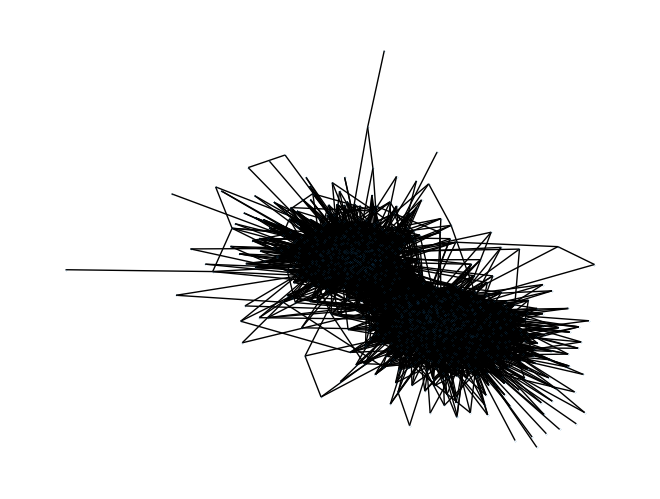

In [3]:
G_strund = nx.Graph(G_strcom)
G_strund.remove_edges_from(nx.selfloop_edges(G_strund))
nx.draw(G_strund, node_size = 0.01)

We are now ready to implement the three main techniques of community detection (except for SBM).
We start by implementing the bridge removal technique and hence the girvan-Newmann algorithm will be used; Betweenness centralities are computed and all links having the greatest BC are deleted until all nodes are dsconnected. Below, we compute all partitions and their modularities, and we extract the one having the largest one using a simple dictionary.

In [ ]:
partitions = nx.community.girvan_newman(G_strund) 
modularities = []
#best = frozenset()
for p in partitions:
    modularities.append(nx.community.quality.modularity(G_strund, p))

#max_ind = modularities.index(max(modularities))
#best = partitions[max_ind] 

# girvan newman ci mette 150 anni; troppo lento e sembra non finire mai.


As we have seen the girvan newman algorithm is extremely slow, as the number of clusters(communities) identified is huge.
The next algorithm that we will use is the newman's greedy algorithm, a slow but effective algorithm that optimizes the modularity of each partition, merging the 2 having the lowest decrease in the graph modularity.
It is then convient to save found clusters in a dictionary.

In [5]:
import time    #cmpute execution time
start = time.time()
mod_opt = nx.community.greedy_modularity_communities(G_strund)  #controlla week6 (slides messe dal prof)
print(mod_opt)
nmodopt = len(mod_opt)   #clusters identificati dall'algoritmo
print(f"There are {len(mod_opt)} detected communities using the newman's greedy algorithm")
end = time.time()
timemodopt = end-start 
mod_opt2 = [list(c) for c in mod_opt] 
clustersmod_opt = {}
n = 1
for x in mod_opt2:
    clustersmod_opt[n] = x    #dizionario con chiave n.cluster e values i nodi nel cluster
    n+=1

[frozenset({1024, 1026, 1028, 5, 1031, 1036, 1037, 1038, 1040, 1041, 1044, 1045, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1060, 1061, 1062, 1063, 1065, 1068, 1069, 1070, 1071, 1072, 1076, 1077, 1080, 1081, 1082, 1084, 1085, 1087, 1088, 1090, 1091, 1092, 1093, 1095, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1112, 1114, 1116, 1121, 1123, 1124, 1125, 1126, 1128, 1129, 1130, 1133, 1135, 1141, 119, 1144, 1146, 1149, 1150, 1152, 1153, 1154, 136, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1172, 1175, 1177, 1179, 1185, 1187, 1188, 1191, 1192, 1194, 1195, 1196, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1209, 1210, 1211, 1213, 1214, 1215, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1226, 203, 1227, 1231, 1232, 1236, 1238, 1240, 1242, 1244, 1245, 1246, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1264, 1266, 1268, 1269, 1270, 1271, 249, 1274, 1275, 1277, 1278, 1279, 1280, 1287, 1288, 1290, 1295, 1296, 1298, 1300, 1301, 1305, 1306, 1307, 1308, 1309,

For the label propagation algorithm we will use list instead of frozen set as this data structure will be extremely useful when computing NMI and other comparison parameters.

In [6]:
import time
start = time.time()
labprcom = nx.community.asyn_lpa_communities(G_strund)
#create a frozen set
partition_lp = [list(c) for c in labprcom]   #invece di usare un frozen set ho usato una lista
labmod = {}   
print(partition_lp)
npartlab = len(partition_lp)
print(f"There are {len(partition_lp)} communities detected using the label propagation algorithm")
end = time.time()
lpatime = end-start 
n = 1
clusterslp = {}
for y in partition_lp:
    clusterslp[n] = y
    n+=1                       #dizionario con chiave n.cluster e value nodi nel cluster
print(clusterslp)


[[1, 2, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 110, 113, 114, 115, 118, 123, 124, 130, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 194, 202, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 313, 316, 317, 321, 323, 326, 329, 331, 332, 333, 335, 337, 341, 347, 349, 350, 351, 353, 358, 361, 363, 370, 371, 374, 377, 379, 380, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 409, 410, 415, 417, 420, 422, 424, 426, 427, 431, 432, 434, 436, 439, 440, 441, 444, 446, 449, 450, 451, 452, 453, 454, 460, 461, 465, 466, 467, 468, 469, 472, 475, 477, 479, 480, 481, 483, 484, 489, 491, 4

Once we have found all the communities, we want to compare them all using NMI , cluster size distribution and computational time and modularity. Before though, we want to create 2 vectors such that each element in a the vector corresponds to the n.cluster it was assigned by the 2 algorithms. In this way we can easily compute the NMi.

In [7]:
listgreedy = []
listlpa = []

Nodesund = list(G_strund.nodes())
for node in Nodesund:
    for k,v in clustersmod_opt.items():
        if node in v:
            listgreedy.append(k) 

    for k,v in clusterslp.items():
        if node in v: 
            listlpa.append(k)





In [20]:
from sklearn.metrics.cluster import normalized_mutual_info_score
import networkx.algorithms.community as nx_comm

def nmi(G_strund,part1, part2):
    x = normalized_mutual_info_score(part1,part2)        #nmi controllare documentazione, anche se funziona
    return x 

nmi(list(clusterslp.values()))

nmi(G_strund, listgreedy, listlpa)

def nclusters(part):      #numero di cluster, input le partizioni fatte sopra(molto banale)
    x = len(part)
    return x 

def cl_size(part):         #distribuzione delle cluster sizes per ogni algo
    distr = []
    for el in part:
        distr.append(len(el))
    
    plt.hist(x = distr)


def modularity(G_strund, part):
    x = nx_comm.quality.modularity(G_strund,part)
    print(f'modularity of the partion {part} is {x}')
    return x 

modularity(G_strund, list(clusterslp.values()))  




    

modularity of the partion [[1, 2, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 110, 113, 114, 115, 118, 123, 124, 130, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 194, 202, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 313, 316, 317, 321, 323, 326, 329, 331, 332, 333, 335, 337, 341, 347, 349, 350, 351, 353, 358, 361, 363, 370, 371, 374, 377, 379, 380, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 409, 410, 415, 417, 420, 422, 424, 426, 427, 431, 432, 434, 436, 439, 440, 441, 444, 446, 449, 450, 451, 452, 453, 454, 460, 461, 465, 466, 467, 468, 469, 472, 475, 477, 479, 480, 

0.4333575254401296

Week 7:

In [52]:
pairs = list(G_strund.edges())
cndict = {}
class Indeces:
    def __init__(self, pairs, graph):
        self.pairs = pairs
        self.graph = graph

    def Cn(self,pairs,graph):
        for el in pairs:
            x,y = el[0], el[1]
            c = nx.common_neighbors(graph, x, y)
            cndict[x,y] = list(c) 
        return cndict  


        #Cn(G_strund, x, y)


    def Ji(self,graph):
        ji = list(nx.jaccard_coefficient(graph)) 
        return ji

    #ji2 = Ji(G_strund) 


    def PA(self,graph):
        pa = list(nx.preferential_attachment(graph))  
        return pa
    #pa = PA(G_strund)


    def AA(self,graph):
        aa = list(nx.adamic_adar_index(graph))  
        return aa
    #aa = AA(G_strund)

    def RA(self,graph):
        ra = list(nx.resource_allocation_index(graph)) 
        return ra 
    #ra = RA(G_strund) 
    
indeces = Indeces(pairs, G_strund)
cn = indeces.Cn(pairs,G_strund)
ji = indeces.Ji(G_strund)
pa = indeces.PA(G_strund)
aa = indeces.AA(G_strund)
ra = indeces.RA(G_strund)





